In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv ('Data/Творожные десерты.csv')
df

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18
0,2,1,3,5,3,3,5,2,2,1,3,3,3,3,5,1,3,2
1,2,4,3,3,4,3,4,3,4,5,4,3,3,2,5,1,3,1
2,4,2,5,3,5,2,4,2,3,3,6,3,2,2,5,1,2,1
3,2,3,3,1,4,2,5,1,4,4,4,4,2,2,6,1,2,3
4,2,2,3,2,3,3,5,3,2,3,3,4,3,2,6,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,5,2,5,3,2,2,4,5,2,2,2,3,4,3,4,0,2,3
171,5,1,6,4,2,1,5,4,2,2,3,4,2,2,6,0,4,3
172,5,1,6,3,2,2,5,5,2,2,2,4,4,3,6,0,4,3
173,4,1,4,4,2,2,5,5,1,1,3,4,3,3,6,0,2,3


q1	Отсутствие консерванов и красителей	1 - вообще не важно, 6 - очень важно

q2	Дизайн упаковки	1 - вообще не важно, 6 - очень важно

q3	Натуральные ингредиенты	1 - вообще не важно, 6 - очень важно

q4	Фирма производитель	1 - вообще не важно, 6 - очень важно

q5	Цена	1 - вообще не важно, 6 - очень важно

q6	Условия хранения	1 - вообще не важно, 6 - очень важно

q7	Вкусовые качества	1 - вообще не важно, 6 - очень важно

q8	Срок годности	1 - вообще не важно, 6 - очень важно

q9	Внешний вид продукта	1 - вообще не важно, 6 - очень важно

q10	Формат упаковки	1 - вообще не важно, 6 - очень важно

q11	Наличие акций	1 - вообще не важно, 6 - очень важно

q12	Ркомендации друзей/знакомых	1 - вообще не важно, 6 - очень важно

q13	Хорошая реклама	1 - вообще не важно, 6 - очень важно

q14	Наличие в магазине	1 - вообще не важно, 6 - очень важно

q15	Ассортиментный ряд	1 - вообще не важно, 6 - очень важно

q16	Пол	0 - женщины, 1 - мужчины

q17	Возраст	1 - до 20 лет, 2 - 20-30 лет, 3 - 30-40 лет, 4 - старше 40 лет

q18	Доход	1 - меньше 400 USD, 2 - 400-1000 USD, 3 - больше 1000 USD

## Проводится сравнение средних для отбора переменных для кластеризации 

In [3]:
# Сохраним в отдельные переменные выборки, которые собираемся сравнивать
a = df[df['q16'] == 1]['q2']
b = df[df['q16'] == 0]['q2']

In [4]:
# Сравним средние ранговые с помощью критерия Манна-Уитни.
# В алгоритм заложен расчет "значимость Монте-Карло односторонняя, основанная на выборке 10 000 таблиц"
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(a, b)
print('Mann–Whitney test = %.1f, sig. = %.3f' % (stat, p))

Mann–Whitney test = 3417.5, sig. = 0.103


In [5]:
# Сравним средние ранговые с помощью критерия Манна-Уитни. Это пример скрипта - 2 способ реализации. 
# В алгоритм заложен расчет "значимость Монте-Карло односторонняя"
from scipy import stats
res = stats.mannwhitneyu(a, b)
print('p-value = %.3f' % res[1])

p-value = 0.103


In [6]:
# Сохраним в отдельные переменные выборки, которые собираемся сравнивать
c = df[df['q17'] == 1]['q1']
d = df[df['q17'] == 2]['q1']
e = df[df['q17'] == 3]['q1']
f = df[df['q17'] == 4]['q1']

In [7]:
# Сравним средние ранговые с помощью критерия Краскела-Уоллиса. В алгоритм заложен расчет "значимость асимтотическая"
from scipy.stats import kruskal
stat, p = kruskal(c, d, e, f)
print('Kruskal–Wallis test = %.2f, sig. = %.3f' % (stat, p))

Kruskal–Wallis test = 1.05, sig. = 0.790


Примечание: Есть два пути. Первый путь - перед началом кластеризации отобрать значимые переменные. Для этого нужно провести сравнение средних для каждого признака покупателя (пол, возраст, личный доход) для каждого из ответов.  Выше проведены 2 теста. Пришлось бы сделать еще 43 теста. И потом сопоставить - там где в ответах нет отличий по всем трем признакам покупателей, значит этот ответ не будет значим для кластеризации. Это довольно трудоемко. Поэтому можно выбрать второй путь. Сначала включить в кластеризацию все переменные. Затем проверить - какие из них не значимы? После этого убрать незначимые переменные и провести кластерный анализ заново. Так и поступим.

# Кластерный анализ

In [8]:
# Зададим переменную с массивом независимых переменных, по которым будет осуществляться кластеризация
X = df.drop(['q16', 'q17', 'q18'], axis=1)
print(X)

     q1  q2  q3  q4  q5  q6  q7  q8  q9  q10  q11  q12  q13  q14  q15
0     2   1   3   5   3   3   5   2   2    1    3    3    3    3    5
1     2   4   3   3   4   3   4   3   4    5    4    3    3    2    5
2     4   2   5   3   5   2   4   2   3    3    6    3    2    2    5
3     2   3   3   1   4   2   5   1   4    4    4    4    2    2    6
4     2   2   3   2   3   3   5   3   2    3    3    4    3    2    6
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...
170   5   2   5   3   2   2   4   5   2    2    2    3    4    3    4
171   5   1   6   4   2   1   5   4   2    2    3    4    2    2    6
172   5   1   6   3   2   2   5   5   2    2    2    4    4    3    6
173   4   1   4   4   2   2   5   5   1    1    3    4    3    3    6
174   4   1   5   2   2   1   5   5   2    1    3    4    4    2    6

[175 rows x 15 columns]


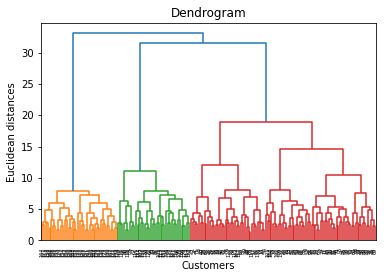

In [9]:
# Иерархическая кластеризация. Построение дендрограммы
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [10]:
# Кластеризация методом K-means
from sklearn.cluster import KMeans
clusterNum = 3
k_means = KMeans(init='k-means++', n_clusters=clusterNum,n_init=12)
k_means.fit(X)
labels=k_means.labels_
print(labels)

[1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 2 1 1 1 2 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 0 2 2 2 2
 2 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
# Добавление в исходный набор данных полученной переменной, которая указывает принадлежность к кластеру
df['Clus']=labels # добавится колонка с отнесением покупателей на кластеры
df

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,Clus
0,2,1,3,5,3,3,5,2,2,1,3,3,3,3,5,1,3,2,1
1,2,4,3,3,4,3,4,3,4,5,4,3,3,2,5,1,3,1,1
2,4,2,5,3,5,2,4,2,3,3,6,3,2,2,5,1,2,1,1
3,2,3,3,1,4,2,5,1,4,4,4,4,2,2,6,1,2,3,1
4,2,2,3,2,3,3,5,3,2,3,3,4,3,2,6,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,5,2,5,3,2,2,4,5,2,2,2,3,4,3,4,0,2,3,0
171,5,1,6,4,2,1,5,4,2,2,3,4,2,2,6,0,4,3,0
172,5,1,6,3,2,2,5,5,2,2,2,4,4,3,6,0,4,3,0
173,4,1,4,4,2,2,5,5,1,1,3,4,3,3,6,0,2,3,0


In [12]:
# Число покупателей в каждом кластере
df['Clus'].value_counts()

1    80
0    48
2    47
Name: Clus, dtype: int64

# Проверим: все ли переменные значимы для кластеризации?

In [13]:
# Сохраним в отдельные переменные выборки, которые собираемся сравнивать
x_1 = df[df['Clus'] == 0]['q1']
y_1 = df[df['Clus'] == 1]['q1']
z_1 = df[df['Clus'] == 2]['q1']

In [14]:
from scipy.stats import kruskal
stat, p = kruskal(x_1, y_1, z_1)
print('Kruskal–Wallis test for q1 = %.2f, sig. = %.3f' % (stat, p))

Kruskal–Wallis test for q1 = 77.09, sig. = 0.000


In [15]:
x_2 = df[df['Clus'] == 0]['q2']
y_2 = df[df['Clus'] == 1]['q2']
z_2 = df[df['Clus'] == 2]['q2']
stat, p = kruskal(x_2, y_2, z_2)
print('Kruskal–Wallis test for q2 = %.2f, sig. = %.3f' % (stat, p))
x_3 = df[df['Clus'] == 0]['q3']
y_3 = df[df['Clus'] == 1]['q3']
z_3 = df[df['Clus'] == 2]['q3']
stat, p = kruskal(x_3, y_3, z_3)
print('Kruskal–Wallis test for q3 = %.2f, sig. = %.3f' % (stat, p))
x_4 = df[df['Clus'] == 0]['q4']
y_4 = df[df['Clus'] == 1]['q4']
z_4 = df[df['Clus'] == 2]['q4']
stat, p = kruskal(x_4, y_4, z_4)
print('Kruskal–Wallis test for q4 = %.2f, sig. = %.3f' % (stat, p))
x_5 = df[df['Clus'] == 0]['q5']
y_5 = df[df['Clus'] == 1]['q5']
z_5 = df[df['Clus'] == 2]['q5']
stat, p = kruskal(x_5, y_5, z_5)
print('Kruskal–Wallis test for q5 = %.2f, sig. = %.3f' % (stat, p))
x_6 = df[df['Clus'] == 0]['q6']
y_6 = df[df['Clus'] == 1]['q6']
z_6 = df[df['Clus'] == 2]['q6']
stat, p = kruskal(x_6, y_6, z_6)
print('Kruskal–Wallis test for q6 = %.2f, sig. = %.3f' % (stat, p))
x_7 = df[df['Clus'] == 0]['q7']
y_7 = df[df['Clus'] == 1]['q7']
z_7 = df[df['Clus'] == 2]['q7']
stat, p = kruskal(x_7, y_7, z_7)
print('Kruskal–Wallis test for q7 = %.2f, sig. = %.3f' % (stat, p))
x_8 = df[df['Clus'] == 0]['q8']
y_8 = df[df['Clus'] == 1]['q8']
z_8 = df[df['Clus'] == 2]['q8']
stat, p = kruskal(x_8, y_8, z_8)
print('Kruskal–Wallis test for q8 = %.2f, sig. = %.3f' % (stat, p))
x_9 = df[df['Clus'] == 0]['q9']
y_9 = df[df['Clus'] == 1]['q9']
z_9 = df[df['Clus'] == 2]['q9']
stat, p = kruskal(x_9, y_9, z_9)
print('Kruskal–Wallis test for q9 = %.2f, sig. = %.3f' % (stat, p))
x_10 = df[df['Clus'] == 0]['q10']
y_10 = df[df['Clus'] == 1]['q10']
z_10 = df[df['Clus'] == 2]['q10']
stat, p = kruskal(x_10, y_10, z_10)
print('Kruskal–Wallis test for q10 = %.2f, sig. = %.3f' % (stat, p))
x_11 = df[df['Clus'] == 0]['q11']
y_11 = df[df['Clus'] == 1]['q11']
z_11 = df[df['Clus'] == 2]['q11']
stat, p = kruskal(x_11, y_11, z_11)
print('Kruskal–Wallis test for q11 = %.2f, sig. = %.3f' % (stat, p))
x_12 = df[df['Clus'] == 0]['q12']
y_12 = df[df['Clus'] == 1]['q12']
z_12 = df[df['Clus'] == 2]['q12']
stat, p = kruskal(x_12, y_12, z_12)
print('Kruskal–Wallis test for q12 = %.2f, sig. = %.3f' % (stat, p))
x_13 = df[df['Clus'] == 0]['q13']
y_13 = df[df['Clus'] == 1]['q13']
z_13 = df[df['Clus'] == 2]['q13']
stat, p = kruskal(x_13, y_13, z_13)
print('Kruskal–Wallis test for q13 = %.2f, sig. = %.3f' % (stat, p))
x_14 = df[df['Clus'] == 0]['q14']
y_14 = df[df['Clus'] == 1]['q14']
z_14 = df[df['Clus'] == 2]['q14']
stat, p = kruskal(x_14, y_14, z_14)
print('Kruskal–Wallis test for q14 = %.2f, sig. = %.3f' % (stat, p))
x_15 = df[df['Clus'] == 0]['q15']
y_15 = df[df['Clus'] == 1]['q15']
z_15 = df[df['Clus'] == 2]['q15']
stat, p = kruskal(x_15, y_15, z_15)
print('Kruskal–Wallis test for q15 = %.2f, sig. = %.3f' % (stat, p))

Kruskal–Wallis test for q2 = 104.07, sig. = 0.000
Kruskal–Wallis test for q3 = 51.28, sig. = 0.000
Kruskal–Wallis test for q4 = 2.15, sig. = 0.341
Kruskal–Wallis test for q5 = 117.41, sig. = 0.000
Kruskal–Wallis test for q6 = 28.10, sig. = 0.000
Kruskal–Wallis test for q7 = 25.06, sig. = 0.000
Kruskal–Wallis test for q8 = 90.17, sig. = 0.000
Kruskal–Wallis test for q9 = 92.80, sig. = 0.000
Kruskal–Wallis test for q10 = 90.81, sig. = 0.000
Kruskal–Wallis test for q11 = 109.66, sig. = 0.000
Kruskal–Wallis test for q12 = 0.34, sig. = 0.844
Kruskal–Wallis test for q13 = 4.87, sig. = 0.088
Kruskal–Wallis test for q14 = 16.63, sig. = 0.000
Kruskal–Wallis test for q15 = 14.56, sig. = 0.001


#### Вывод: Переменные q2, q12, q13 не значимы (sig. > 0.05). Соответственно их нужно убрать из кластеризации.

# Повторная кластеризация

In [16]:
# Зададим переменную с массивом независимых переменных, по которым будет осуществляться кластеризация
X2 = df.drop(['q16','q17','q18','q2','q12','q13','Clus'], axis=1)
print(X2)

     q1  q3  q4  q5  q6  q7  q8  q9  q10  q11  q14  q15
0     2   3   5   3   3   5   2   2    1    3    3    5
1     2   3   3   4   3   4   3   4    5    4    2    5
2     4   5   3   5   2   4   2   3    3    6    2    5
3     2   3   1   4   2   5   1   4    4    4    2    6
4     2   3   2   3   3   5   3   2    3    3    2    6
..   ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...
170   5   5   3   2   2   4   5   2    2    2    3    4
171   5   6   4   2   1   5   4   2    2    3    2    6
172   5   6   3   2   2   5   5   2    2    2    3    6
173   4   4   4   2   2   5   5   1    1    3    3    6
174   4   5   2   2   1   5   5   2    1    3    2    6

[175 rows x 12 columns]


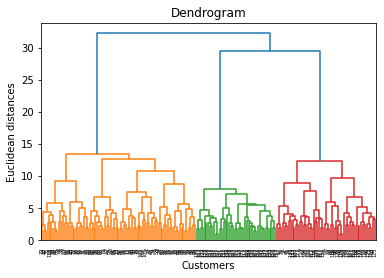

In [17]:
# Иерархическая кластеризация. Построение дендрограммы
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [18]:
# Кластеризация методом K-means
from sklearn.cluster import KMeans
clusterNum = 3
k_means = KMeans(init='k-means++', n_clusters=clusterNum,n_init=12)
k_means.fit(X2)
labels=k_means.labels_
print(labels)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 2 1 1 1 1
 1 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [19]:
# Добавление в исходный набор данных полученной переменной, которая указывает принадлежность к кластеру
df['Clus_1.2']=labels # добавится колонка с отнесением покупателей на кластеры
df

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,Clus,Clus_1.2
0,2,1,3,5,3,3,5,2,2,1,3,3,3,3,5,1,3,2,1,0
1,2,4,3,3,4,3,4,3,4,5,4,3,3,2,5,1,3,1,1,0
2,4,2,5,3,5,2,4,2,3,3,6,3,2,2,5,1,2,1,1,0
3,2,3,3,1,4,2,5,1,4,4,4,4,2,2,6,1,2,3,1,0
4,2,2,3,2,3,3,5,3,2,3,3,4,3,2,6,1,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,5,2,5,3,2,2,4,5,2,2,2,3,4,3,4,0,2,3,0,2
171,5,1,6,4,2,1,5,4,2,2,3,4,2,2,6,0,4,3,0,2
172,5,1,6,3,2,2,5,5,2,2,2,4,4,3,6,0,4,3,0,2
173,4,1,4,4,2,2,5,5,1,1,3,4,3,3,6,0,2,3,0,2


In [20]:
# Число покупателей в каждом кластере
df['Clus_1.2'].value_counts()

0    84
1    46
2    45
Name: Clus_1.2, dtype: int64

Вывод: Обратите внимание, что после того, как были убраны три незначимые переменные, то результаты кластеризации стали не значительно, но отличаться. В первом случае было - 80/48/47, во втором случае - 84/46/45.

### Выполним кластеризацию еще одним методом - Иерархической кластеризацией (метод Уорда)

In [21]:
# Кластеризация методом иерархической кластеризации (методом Уорда)
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
clus_2 = hc.fit_predict(X2)

In [22]:
print(clus_2)

[0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 2 1 1 1 1
 1 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [23]:
# Добавление в исходный набор данных полученной переменной, которая указывает принадлежность к кластеру
df['Clus_2']=clus_2 # добавится колонка с отнесением покупателей на кластеры
df

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q12,q13,q14,q15,q16,q17,q18,Clus,Clus_1.2,Clus_2
0,2,1,3,5,3,3,5,2,2,1,...,3,3,3,5,1,3,2,1,0,0
1,2,4,3,3,4,3,4,3,4,5,...,3,3,2,5,1,3,1,1,0,1
2,4,2,5,3,5,2,4,2,3,3,...,3,2,2,5,1,2,1,1,0,0
3,2,3,3,1,4,2,5,1,4,4,...,4,2,2,6,1,2,3,1,0,0
4,2,2,3,2,3,3,5,3,2,3,...,4,3,2,6,1,3,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,5,2,5,3,2,2,4,5,2,2,...,3,4,3,4,0,2,3,0,2,2
171,5,1,6,4,2,1,5,4,2,2,...,4,2,2,6,0,4,3,0,2,2
172,5,1,6,3,2,2,5,5,2,2,...,4,4,3,6,0,4,3,0,2,2
173,4,1,4,4,2,2,5,5,1,1,...,4,3,3,6,0,2,3,0,2,2


In [24]:
# Число покупателей в каждом кластере
df['Clus_2'].value_counts()

0    81
1    52
2    42
Name: Clus_2, dtype: int64

Вывод: Метод K-means и иерархическая кластеризация дали похожие результаты (соответственно - 84/46/45 и 81/52/42)

### Построим таблицы сопряженности по полу, возрасту и доходу, чтобы посмотреть: кто оказался в кластерах? Таблицы построим по результатам кластеризации методом K-means

In [25]:
# таблица сопряженности между переменными "пол" и "номер кластера"
pd.crosstab(df['Clus_1.2'], df['q16'], margins=True)

q16,0,1,All
Clus_1.2,,,
0,4,80,84
1,41,5,46
2,42,3,45
All,87,88,175


In [26]:
# таблица сопряженности между переменными "возраст" и "номер кластера"
pd.crosstab(df['Clus_1.2'], df['q17'], margins=True)

q17,1,2,3,4,All
Clus_1.2,,,,,
0,11,32,28,13,84
1,20,22,2,2,46
2,3,12,19,11,45
All,34,66,49,26,175


In [27]:
# таблица сопряженности между переменными "личный доход" и "номер кластера"
pd.crosstab(df['Clus_1.2'], df['q18'], margins=True)

q18,1,2,3,All
Clus_1.2,,,,
0,24,47,13,84
1,28,17,1,46
2,2,16,27,45
All,54,80,41,175


### Вывод: 
Кластер 0 - мужчины 20-40 лет с низким и средним доходом

Кластер 1 - женщины моложе 30 лет с низкими и средним доходом

Кластер 2 - женщины старше 30 лет с доходом свыше 1000 долларов

#### Построим таблицу со средними арифметическими по q1-q3, q5-q11, q14, q15 для каждого кластера, чтобы понять: что важно для представителей каждого кластера?

In [28]:
# Сравнение средних оценок по каждой независимой переменной (q1-q3, q5-q11, q14, q15) для каждого кластера
df.groupby('Clus_1.2', axis=0).mean()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,Clus,Clus_2
Clus_1.2,,,,,,,,,,,,,,,,,,,,
0,2.952381,2.380952,3.916667,3.119048,4.095238,2.000000,4.035714,2.000000,2.904762,2.904762,4.714286,3.547619,3.023810,2.988095,4.535714,0.952381,2.511905,1.869048,0.97619,0.083333
1,3.891304,3.891304,4.391304,2.826087,2.021739,2.434783,3.934783,1.869565,4.434783,4.413043,2.608696,3.586957,2.934783,3.586957,4.434783,0.108696,1.695652,1.413043,2.00000,0.978261
2,4.488889,1.533333,5.133333,3.022222,2.088889,1.666667,4.555556,3.977778,2.022222,2.000000,2.555556,3.555556,3.222222,2.555556,5.088889,0.066667,2.844444,2.555556,0.00000,1.866667


### Вывод: 
Кластер 0 - мужчины 20-40 лет с низким и средним доходом / q5, q11, цена, наличие акций

Кластер 1 - женщины моложе 30 лет с низкими и средним доходом / q2, q9, q10, q14 дизайн упаковки, внешний вид продукта, формат упаковки, наличие в магазине

Кластер 2 - женщины старше 30 лет с доходом свыше 1000 долларов / что важно: q1, q3, q7, q8, q15 отсутствие красителей, натуральные инградиенты, вкус, срок годности, широта ассортимента